In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import rowgenerators as rg
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
df = pkg.resource('homeless_survey').dataframe()

In [4]:
t1 = pd.pivot_table(df[df.sex!='U'], index='raceeth',columns='sex', values='mental_illness', 
                   margins=True, aggfunc='count')
t1

sex,F,M,All
raceeth,,,
aian,282,522,804
asian,248,501,749
black,10353,21339,31692
hisp,6205,13338,19543
nhopi,118,237,355
nhwhite,4405,10604,15009
other,1169,2576,3745
All,22780,49117,71897


In [5]:
t2 = pd.pivot_table(df[df.sex!='U'], index='raceeth',columns='sex', values='mental_illness', 
                   margins=True, aggfunc='sum')
t2

sex,F,M,All
raceeth,,,
aian,109,163,272
asian,91,114,205
black,3125,5634,8759
hisp,1501,2369,3870
nhopi,39,57,96
nhwhite,1625,3140,4765
other,391,660,1051
All,6881,12137,19018


In [6]:
t2/t1

sex,F,M,All
raceeth,,,
aian,0.386525,0.312261,0.338308
asian,0.366935,0.227545,0.273698
black,0.301845,0.264024,0.276379
hisp,0.241902,0.177613,0.198025
nhopi,0.330508,0.240506,0.270423
nhwhite,0.368899,0.296115,0.317476
other,0.334474,0.256211,0.280641
All,0.302063,0.247104,0.264517


In [7]:
pd.pivot_table(df[df.sex!='U'], index='raceeth',columns='sex', values='mental_illness', 
                   margins=True, aggfunc='mean')

sex,F,M,All
raceeth,,,
aian,0.386525,0.312261,0.338308
asian,0.366935,0.227545,0.273698
black,0.301845,0.264024,0.276379
hisp,0.241902,0.177613,0.198025
nhopi,0.330508,0.240506,0.270423
nhwhite,0.368899,0.296115,0.317476
other,0.334474,0.256211,0.280641
All,0.302063,0.247104,0.264517


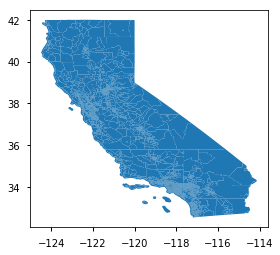

In [8]:
tracts = rg.geoframe('census://CA/140')
tracts.plot()

In [13]:
tj = tracts.merge(df, on='geoid')
tj.head()

,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,aland,awater,...,physical_disability,mental_illness,alcohol_abuse,drug_abuse,drug_alcohol_history,hiv_positive,part_time,full_time,unemployed_looking,unemployed_not_looking
0,06,037,204920,14000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,0,1,0.0,0.0,1,0,0.0,0.0,0.0,0.0
1,06,037,204920,14000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,0,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0
2,06,037,205120,14000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466130,0,...,0,0,0.0,0.0,1,0,0.0,0.0,1.0,0.0
3,06,037,205120,14000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466130,0,...,0,1,0.0,0.0,0,0,0.0,0.0,0.0,1.0
4,06,037,205120,14000US06037205120,2051.20,Census Tract 2051.20,G5020,S,1466130,0,...,1,1,0.0,1.0,1,0,0.0,0.0,0.0,1.0


In [14]:
len(tj)

40513

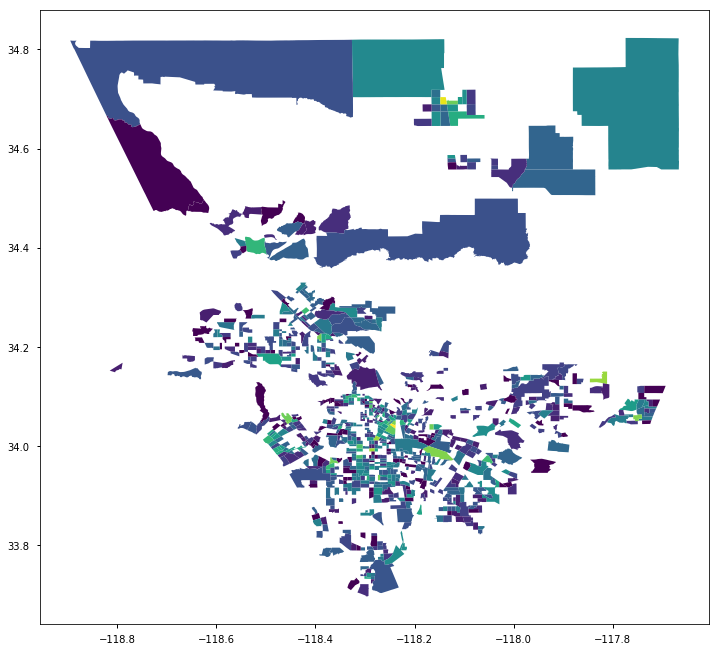

In [43]:
df['n'] = 1
t = df.groupby('geoid').sum()
t['mi_rate'] = t.mental_illness / t['n']
t2 = tracts.set_index('geoid').join(t[['mi_rate', 'n']], how='right')
t2['z'] = np.log(t2['n']/t2['n'].std())
t2.plot(column='z', figsize=(12,12))


In [42]:
t2.z.describe()

count    942.000000
mean       0.215091
std        1.000000
min        0.004803
25%        0.014408
50%        0.038422
75%        0.120070
max       20.546394
Name: z, dtype: float64

In [44]:
t2.to_csv('lacount.csv')